In [1]:
import pandas as pd
import matplotlib.pyplot as plt
fp = r'data/2315676.txt'


data =pd.read_csv(fp,delim_whitespace=True, na_values=[-9999],skiprows=[1])

# YOUR CODE HERE
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,NaN,2.0,-37.0
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,NaN,6.0,-26.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,NaN,7.0,-27.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,NaN,-3.0,-27.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,NaN,4.0,-36.0


In [2]:
def fahr_to_celsius(temp_fahrenheit):
    return (temp_fahrenheit -32) / 1.8
data["TAVG"] = (data["TMAX"] + data["TMIN"])/2
data["TAVG"] = data["TAVG"].apply(fahr_to_celsius)
data.tail()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
41060,GHCND:FI000007501,SODANKYLA-AWS-FI,20201003,NaN,51.0,NaN
41061,GHCND:FI000007501,SODANKYLA-AWS-FI,20201004,5.555556,47.0,37.0
41062,GHCND:FI000007501,SODANKYLA-AWS-FI,20201005,NaN,NaN,37.0
41063,GHCND:FI000007501,SODANKYLA-AWS-FI,20201006,6.944444,46.0,43.0
41064,GHCND:FI000007501,SODANKYLA-AWS-FI,20201007,8.333333,50.0,44.0


In [3]:
def month_to_season(month):
    if month in (12, 1, 2):
        return 'Winter'
    elif month in (3, 4, 5):
        return 'Spring'
    elif month in (6, 7, 8):
        return 'Summer'
    elif month in (9, 10, 11):
        return 'Autumn'
#separating year and season for groupby
data["season"] = data["DATE"].astype(str).str.slice(start=4, stop=6).astype(int)
data["season"] = data["season"].apply(month_to_season)
# data['season'] = data['DATE'].dt.month.apply(month_to_season)
data['year'] = data['DATE'].astype(str).str.slice(start=0, stop=4).astype(int)
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,season,year
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,-27.500000,2.0,-37.0,Winter,1908
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,-23.333333,6.0,-26.0,Winter,1908
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,-23.333333,7.0,-27.0,Winter,1908
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,-26.111111,-3.0,-27.0,Winter,1908
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,-26.666667,4.0,-36.0,Winter,1908


In [4]:
seasonal_temps = data.groupby(['year', 'season'])['TAVG'].mean().unstack() #unstack to simple tabular format
print(seasonal_temps.head())

season    Autumn    Spring     Summer     Winter
year                                            
1908   -1.859217 -2.346743  11.425926 -12.330779
1909   -0.155827 -5.487654  11.814614 -11.580933
1910   -1.742063 -0.122549  10.126812  -9.471767
1911   -1.279150 -2.122347  11.291209 -11.719409
1912   -2.073413 -4.030797  11.095849 -18.745098


In [5]:
reference_temps = data[(data['year'] >= 1951) & (data['year'] <= 1980)].groupby('season')['TAVG'].mean()
print(reference_temps)

season
Autumn    -0.893614
Spring    -2.654668
Summer    12.181331
Winter   -13.835676
Name: TAVG, dtype: float64


In [6]:
anomalies = seasonal_temps.subtract(reference_temps, axis=1)


In [7]:
anomalies.head()

season,Autumn,Spring,Summer,Winter
year,,,,
1908,-0.965604,0.307925,-0.755405,1.504896
1909,0.737787,-2.832986,-0.366718,2.254743
1910,-0.848450,2.532119,-2.054519,4.363909
1911,-0.385536,0.532321,-0.890122,2.116266
1912,-1.179799,-1.376129,-1.085482,-4.909422


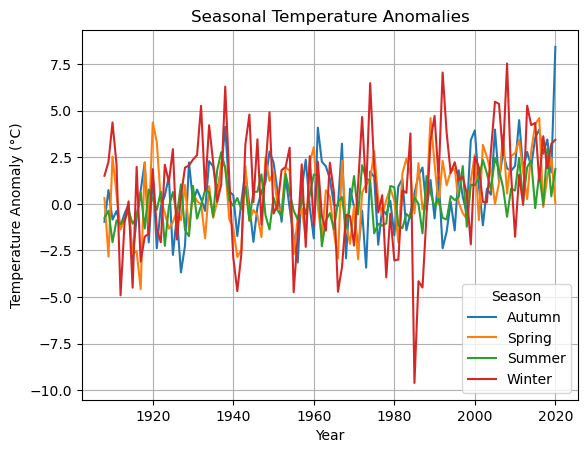

<Figure size 640x480 with 0 Axes>

In [8]:
#ChatGPT
import matplotlib.pyplot as plt

# Plotting while considering NaN values that might cause gaps in the plot
anomalies.plot()
plt.title('Seasonal Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend(title='Season')
plt.grid(True)
plt.show()
plt.savefig("temp_anomalies_1.png")

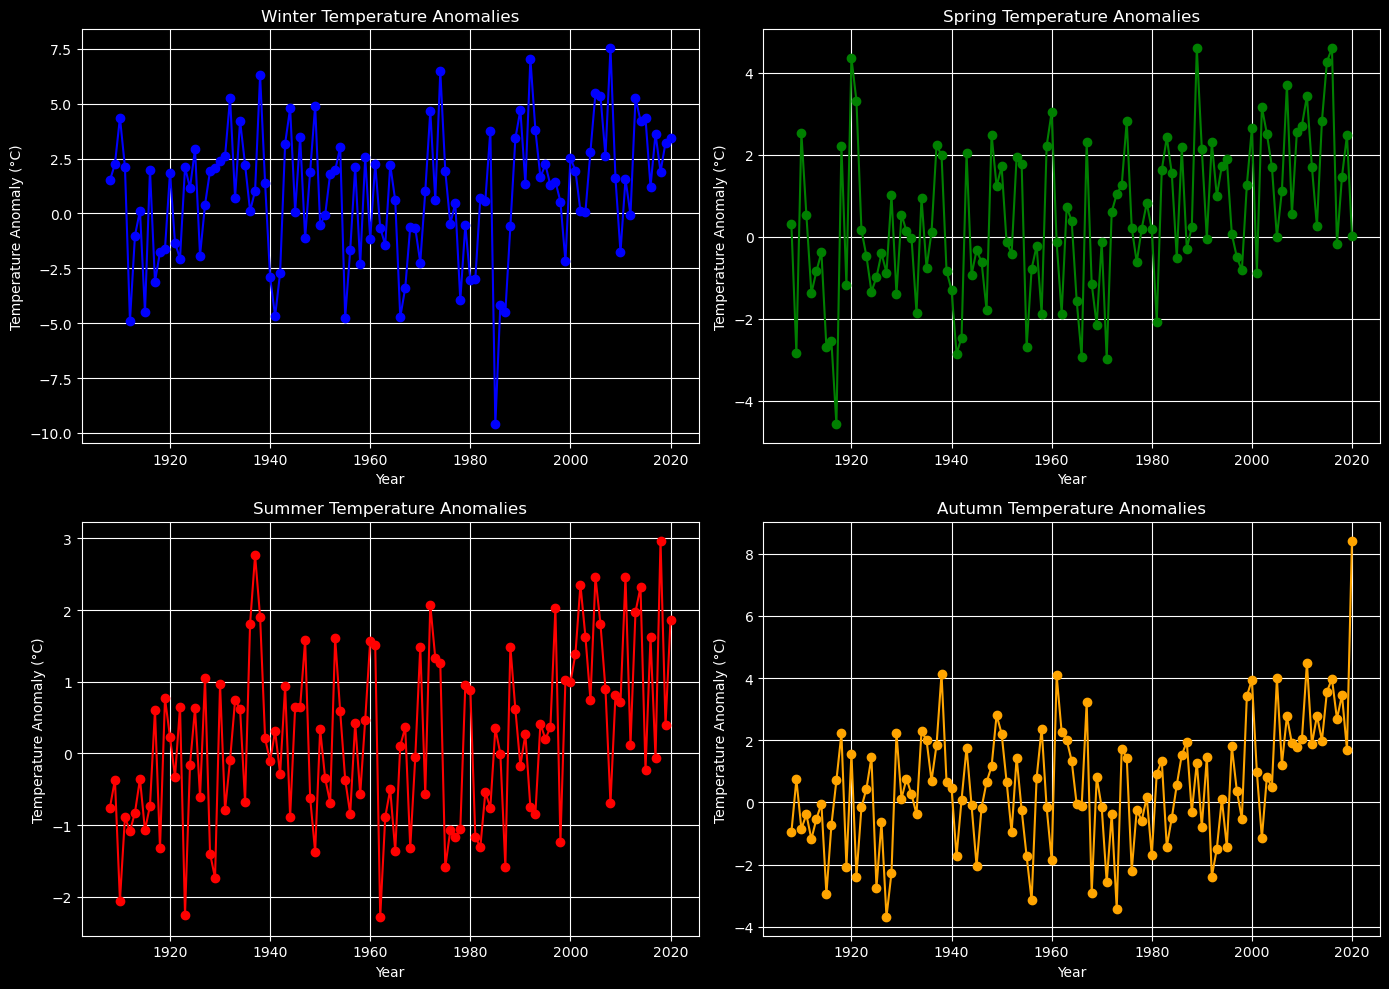

<Figure size 640x480 with 0 Axes>

In [9]:
#ChatGPT

plt.style.use("dark_background")
# Assuming 'anomalies' DataFrame has columns for each season
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Create a 2x2 grid of subplots

# Define colors for each season
colors = ['blue', 'green', 'red', 'orange']

# Plot each season in a separate subplot with a specific color
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
for i, season in enumerate(seasons):
    ax = axs[i//2, i%2]  # Determine the position of the subplot
    ax.plot(anomalies.index, anomalies[season], marker='o', linestyle='-', color=colors[i])
    ax.set_title(f'{season} Temperature Anomalies')
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature Anomaly (°C)')
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
plt.savefig("temp_anomalies_2.png")
outputfp = "scatter_plot.png"



# This test print statement should print the output filename of your figure
print(f"Saved my first plot as {outputfp}")